# Sentiment Analysis by Topic

In [4]:
import sqlite3
import pandas as pd

con = sqlite3.connect('nytimes-comments.db')

comments = pd.read_sql_query("SELECT commentID, commentBody, articleID, Polarity, newDesk FROM commentScore", con)
comments.set_index('articleID')
comments['articleID'].astype(str)
comments.shape

(2047446, 5)

In [40]:
df = comments.groupby('newDesk')['commentID'].nunique()
df

newDesk
Arts&Leisure         6440
Automobiles             7
BookReview           2545
Business            90316
Climate              4502
Culture             25074
Dining              17559
EdLife               2244
Editorial          164135
Express              1992
Foreign            119464
Games               22701
Insider              6330
Investigative        8826
Learning            34413
Letters              1258
Magazine            42264
Metro               25969
Metropolitan         4917
NYTNow                  7
National           365496
NewsDesk             1530
Obits                2201
OpEd               708667
Photo                 222
Podcasts              112
Politics             6959
RealEstate           7165
Science             27812
Smarter Living        761
Society               132
SpecialSections      1365
Sports              21968
Styles               7607
Summary                39
SundayBusiness       7044
TStyle                192
Travel               6382
Unkn

In [5]:
catScore_dict = {}
for index, row in comments.iterrows():
    score = row['Polarity']
    category = row['newDesk']
    if not category in catScore_dict:
        catScore_dict[category] = score
    else:
        catScore_dict[category] += score
catScore_dict

{'Arts&Leisure': 813.5486149606854,
 'Automobiles': 0.440535113035113,
 'BookReview': 335.8176747381531,
 'Business': 7154.400072231235,
 'Climate': 347.01829281838394,
 'Culture': 3258.3851247214807,
 'Dining': 2857.5157036604314,
 'EdLife': 261.8921412212244,
 'Editorial': 10781.03177157727,
 'Express': 151.72161471227218,
 'Foreign': 7238.08393037253,
 'Games': 3159.062887914156,
 'Insider': 767.909300550191,
 'Investigative': 597.3803531880515,
 'Learning': 3175.605380424642,
 'Letters': 108.63260618215816,
 'Magazine': 4692.6449388775645,
 'Metro': 2566.9117871312415,
 'Metropolitan': 837.2518152554494,
 'NYTNow': 1.8670370370370373,
 'National': 23106.085697682443,
 'NewsDesk': 219.70301737820364,
 'Obits': 395.02861950224894,
 'OpEd': 57386.63772705405,
 'Photo': 61.11642157508463,
 'Podcasts': 11.41562097601598,
 'Politics': 537.153664100125,
 'RealEstate': 941.491106311529,
 'Science': 2927.971251504165,
 'Smarter Living': 92.24755224949219,
 'Society': 26.24763748896063,
 'Sp

In [42]:
for key, value in catScore_dict.items():
    catScore_dict[key] = value/df[key]
catScore_dict

{'Arts&Leisure': 0.12632742468333624,
 'Automobiles': 0.062933587576444711,
 'BookReview': 0.1319519350641073,
 'Business': 0.079215200764330071,
 'Climate': 0.077080917996087059,
 'Culture': 0.12995075076659013,
 'Dining': 0.16273795225584781,
 'EdLife': 0.11670772781694491,
 'Editorial': 0.06568392951885503,
 'Express': 0.07616546923306837,
 'Foreign': 0.060587992452726593,
 'Games': 0.13915963560698452,
 'Insider': 0.12131268571093065,
 'Investigative': 0.067684155131209095,
 'Learning': 0.092279236928621222,
 'Letters': 0.086353423038281529,
 'Magazine': 0.11103172768496983,
 'Metro': 0.098845230356626804,
 'Metropolitan': 0.17027696059700009,
 'NYTNow': 0.26671957671957675,
 'National': 0.063218436583936471,
 'NewsDesk': 0.14359674338444683,
 'Obits': 0.17947688300874554,
 'OpEd': 0.08097828419702631,
 'Photo': 0.27529919628416499,
 'Podcasts': 0.10192518728585696,
 'Politics': 0.077188340867958755,
 'RealEstate': 0.13140141051102988,
 'Science': 0.10527726346556038,
 'Smarter Liv

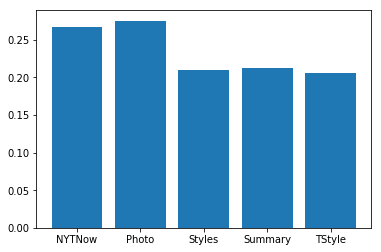

In [43]:
import matplotlib.pyplot as plt

largest_keys = sorted(catScore_dict, key=catScore_dict.get, reverse=True)[:5]
largest_values = sorted([catScore_dict[key] for key in largest_keys], reverse = True)

plt.bar(largest_keys, largest_values)
plt.show()

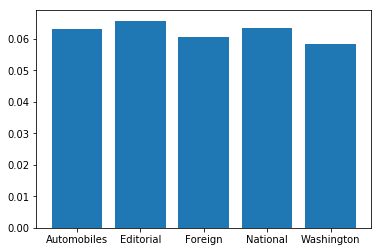

In [47]:
smallest_keys = sorted(catScore_dict, key=catScore_dict.get, reverse=False)[:5]
smallest_values = sorted([catScore_dict[key] for key in smallest_keys], reverse = False)

plt.bar(smallest_keys, smallest_values)
plt.show()